In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the data from a CSV file
df = pd.read_csv("/content/african_crises.csv")


In [2]:
print('Dataset rows: ',df.shape[0])
print('Dataset columns: ',df.shape[1])
print('column names:\n',df.columns)

Dataset rows:  1059
Dataset columns:  14
column names:
 Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')


In [3]:
def explore_df(df):
    print('Data type of each column:\n')
    print(df.dtypes)
    cer_cols=df.select_dtypes(include=['object','int']).columns
    for i in cer_cols:
            print('Column name: ',i,'\n')
            print(df[i].value_counts().sort_values())
    print('missing values in each column\n')
    print(df.isnull().sum())
explore_df(df)

Data type of each column:

case                                 int64
cc3                                 object
country                             object
year                                 int64
systemic_crisis                      int64
exch_usd                           float64
domestic_debt_in_default             int64
sovereign_external_debt_default      int64
gdp_weighted_default               float64
inflation_annual_cpi               float64
independence                         int64
currency_crises                      int64
inflation_crises                     int64
banking_crisis                      object
dtype: object
Column name:  case 

10     58
45     60
15     63
35     67
38     68
69     72
40     75
63     75
2      77
1      85
70     90
56    114
19    155
Name: case, dtype: int64
Column name:  cc3 

CAF     58
NGA     60
CIV     63
KEN     67
MUS     68
ZMB     72
MAR     75
TUN     75
AGO     77
DZA     85
ZWE     90
ZAF    114
EGY    155
Name: cc3, dtype: 

### **Data Cleaning**

*   first we are going to drop some columns
*   change data type values in banking_crises column to 0s and 1s


*   In currency_crises column there is 4 rows its value is 2 but this is error because this column must include 0s and 1s





In [4]:
cols_to_drop=['case','cc3']
cleaned_df=df.drop(cols_to_drop,axis=1)
labels=pd.Categorical(cleaned_df['banking_crisis'])
cleaned_df['banking_crisis']=labels.codes
cleaned_df['currency_crises']=cleaned_df['currency_crises'].replace(2,np.nan)
cleaned_df=cleaned_df.dropna()

In [5]:
cleaned_df['currency_crises']=cleaned_df['currency_crises'].astype(int)

## **Exploratory data analysis**

In [6]:
apply_stats_cols=['exch_usd','gdp_weighted_default','inflation_annual_cpi']
cleaned_df[apply_stats_cols].describe()

,exch_usd,gdp_weighted_default,inflation_annual_cpi
count,1055.000000,1055.000000,1.055000e+03
mean,43.298033,0.006370,2.092517e+04
std,111.657299,0.043622,6.770073e+05
min,0.000000,0.000000,-2.850214e+01
25%,0.195350,0.000000,2.083333e+00
50%,0.898450,0.000000,5.762330e+00
75%,8.485025,0.000000,1.160881e+01
max,744.306139,0.400000,2.198970e+07


In [7]:
cleaned_df.corr()

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
year,1.000000,0.198026,0.249495,0.131808,0.271012,-0.054175,0.037102,0.407166,0.193028,0.094928,-0.212719
systemic_crisis,0.198026,1.000000,0.202363,0.127734,0.253737,0.005496,0.106436,0.147777,0.125626,0.174944,-0.858754
exch_usd,0.249495,0.202363,1.000000,0.008688,0.428740,-0.040473,-0.011992,0.126895,-0.051832,-0.062707,-0.170522
domestic_debt_in_default,0.131808,0.127734,0.008688,1.000000,0.457379,-0.029001,0.155702,0.106855,0.194934,0.206237,-0.218355
sovereign_external_debt_default,0.271012,0.253737,0.428740,0.457379,1.000000,0.346798,0.073379,0.226747,0.177021,0.179674,-0.261504
gdp_weighted_default,-0.054175,0.005496,-0.040473,-0.029001,0.346798,1.000000,-0.004515,0.078636,0.013746,0.018879,-0.027422
inflation_annual_cpi,0.037102,0.106436,-0.011992,0.155702,0.073379,-0.004515,1.000000,0.016638,0.081741,0.080706,-0.099411
independence,0.407166,0.147777,0.126895,0.106855,0.226747,0.078636,0.016638,1.000000,0.079993,-0.024972,-0.159349
currency_crises,0.193028,0.125626,-0.051832,0.194934,0.177021,0.013746,0.081741,0.079993,1.000000,0.395448,-0.165358
inflation_crises,0.094928,0.174944,-0.062707,0.206237,0.179674,0.018879,0.080706,-0.024972,0.395448,1.000000,-0.231188


<AxesSubplot:>

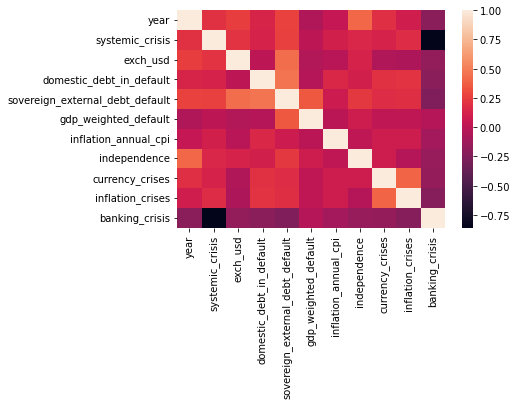

In [ ]:
sns.heatmap(cleaned_df.corr())

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

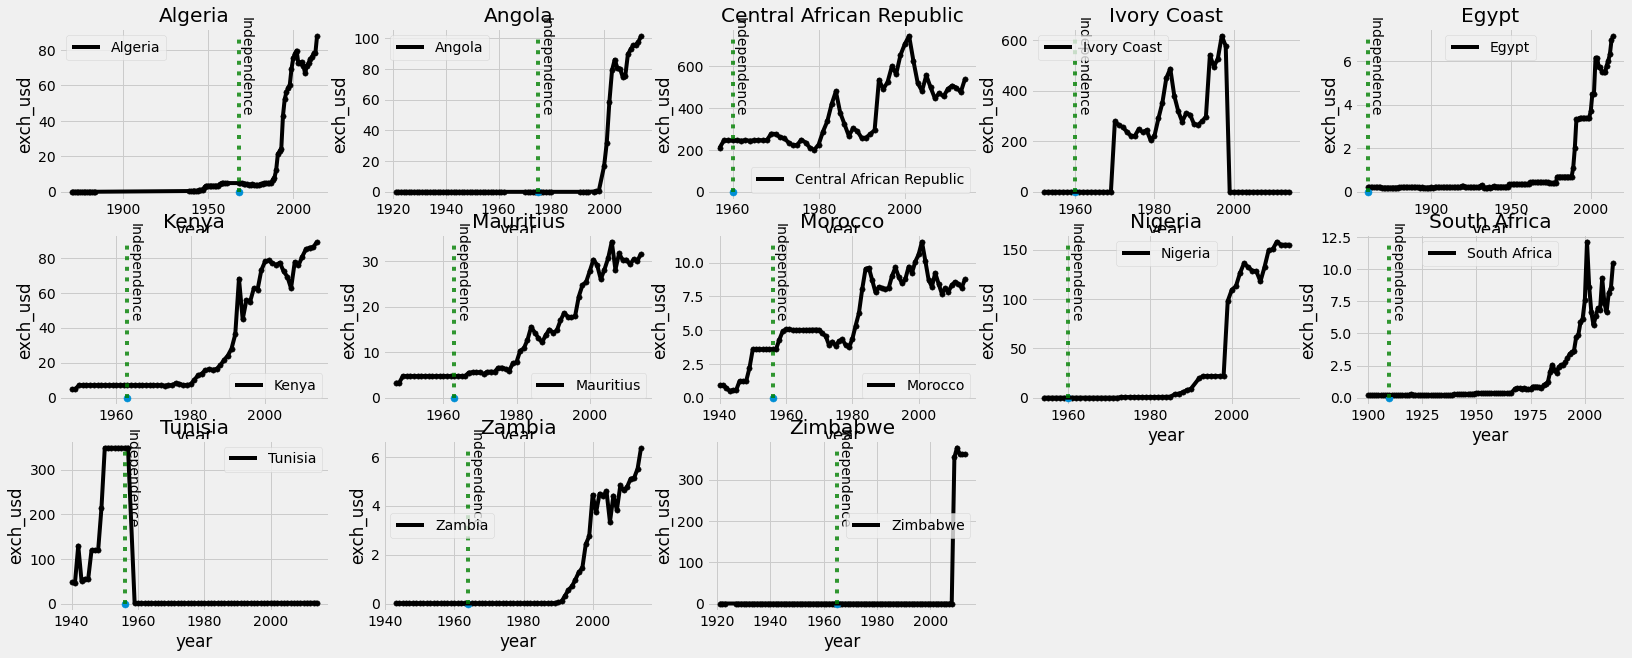

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,10))
countries=cleaned_df['country'].unique().tolist()
count=1
for i in countries:
    plt.subplot(3,5,count)
    count+=1
    sns.lineplot(cleaned_df[cleaned_df.country==i]['year'],
                 cleaned_df[cleaned_df.country==i]['exch_usd'],
                 label=i,
                 color='black')
    plt.scatter(cleaned_df[cleaned_df.country==i]['year'],
                cleaned_df[cleaned_df.country==i]['exch_usd'],
                color='black',
                s=28)
    plt.plot([np.min(cleaned_df[np.logical_and(cleaned_df.country==i,cleaned_df.independence==1)]['year']), 
              np.min(cleaned_df[np.logical_and(cleaned_df.country==i,cleaned_df.independence==1)]['year'])],
             [0,
              np.max(cleaned_df[cleaned_df.country==i]['exch_usd'])],
             color='green',
             linestyle='dotted',
             alpha=0.8)
    plt.text(np.min(cleaned_df[np.logical_and(cleaned_df.country==i,cleaned_df.independence==1)]['year']),
             np.max(cleaned_df[cleaned_df.country==i]['exch_usd'])/2,
             'Independence',
             rotation=-90)
    plt.scatter(x=np.min(cleaned_df[np.logical_and(cleaned_df.country==i,cleaned_df.independence==1)]['year']),
                y=0,
                s=50)
    plt.title(i)
plt.show()


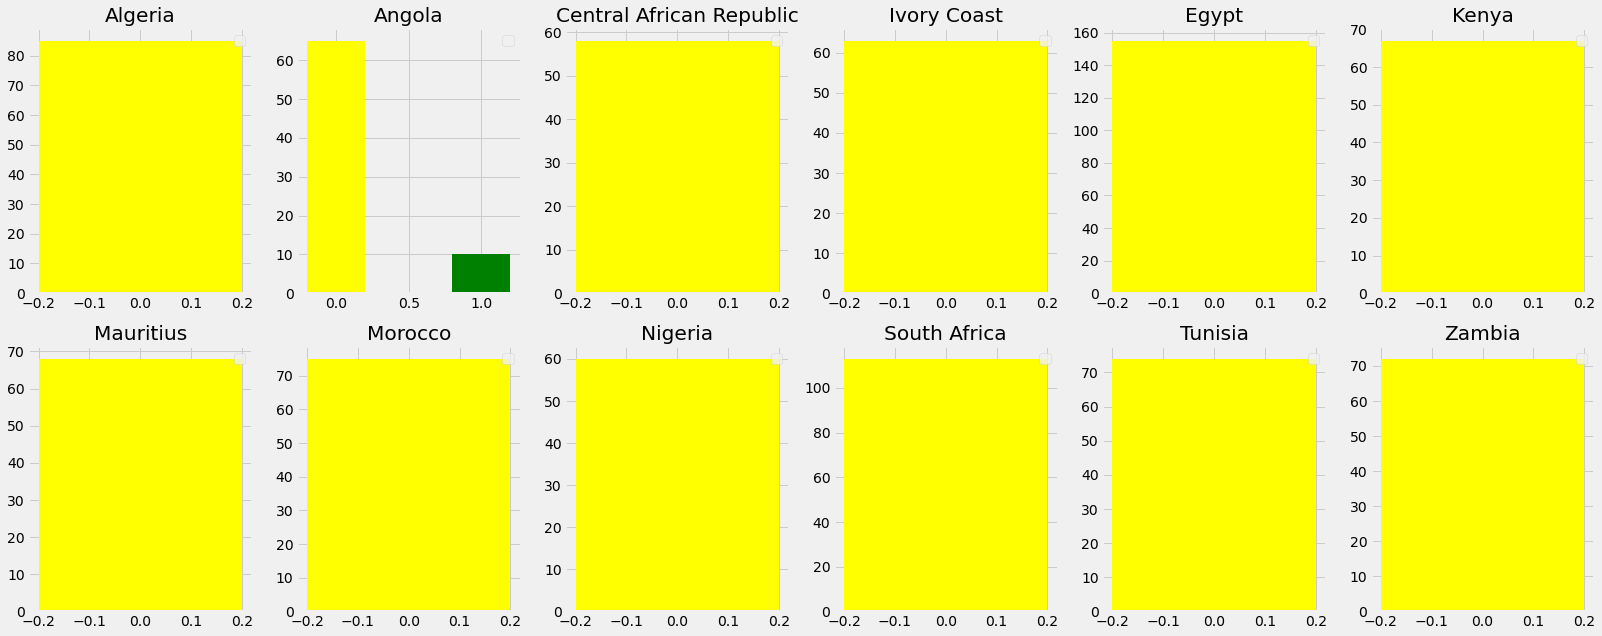

In [ ]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(25,10))
countries=cleaned_df['country'].unique().tolist()
lst_len=len(countries)
for i in range(lst_len-1):
    ax=fig.add_subplot(2,6,i+1)
    c=cleaned_df[cleaned_df['country']==countries[i]]['domestic_debt_in_default'].value_counts()
    ax.bar(c.index,c.tolist(),color=['yellow','green'],width=0.4)
    ax.set_title(countries[i])
    plt.legend(loc='best')
plt.show()

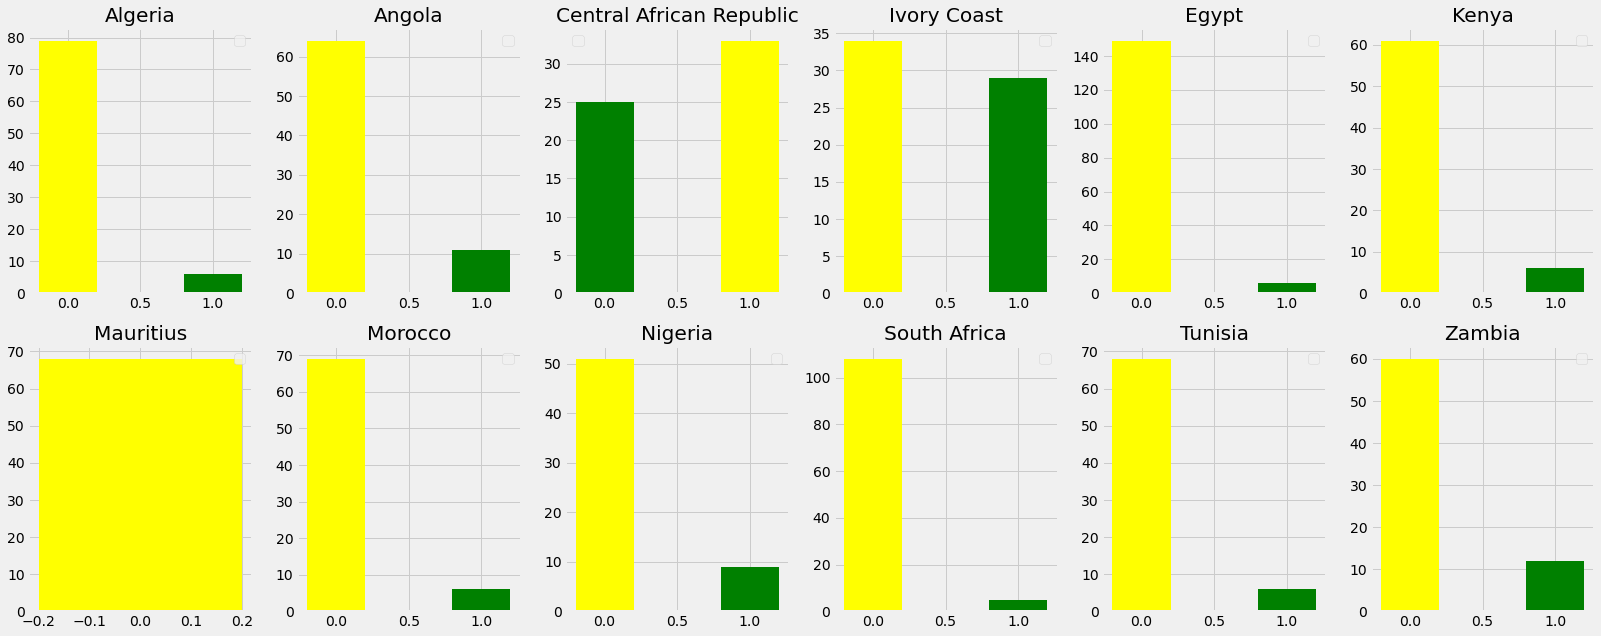

In [ ]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(25,10))
countries=cleaned_df['country'].unique().tolist()
lst_len=len(countries)
for i in range(lst_len-1):
    ax=fig.add_subplot(2,6,i+1)
    c=cleaned_df[cleaned_df['country']==countries[i]]['sovereign_external_debt_default'].value_counts()
    ax.bar(c.index,c.tolist(),color=['yellow','green'],width=0.4)
    ax.set_title(countries[i])
    plt.legend(loc='best')
plt.show()

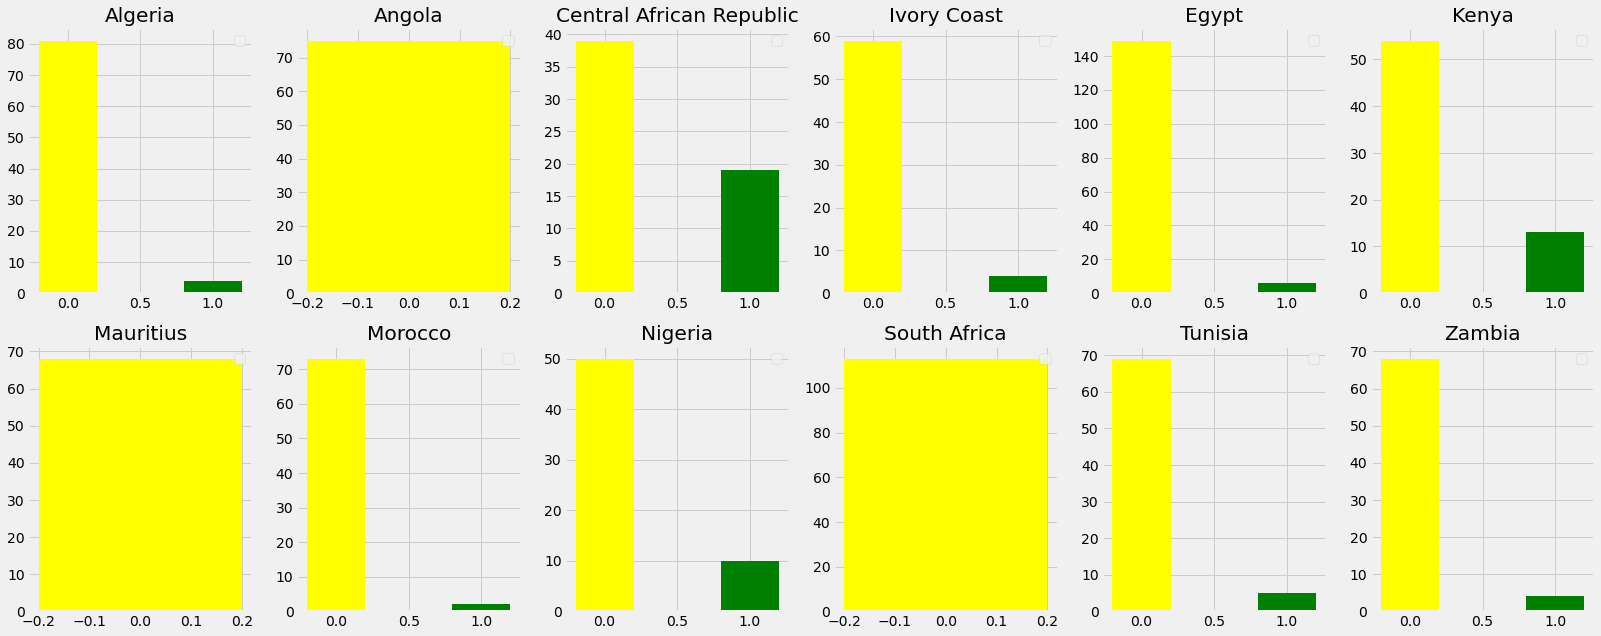

In [ ]:
fig=plt.figure(figsize=(25,10))
countries=cleaned_df['country'].unique().tolist()
lst_len=len(countries)
for i in range(lst_len-1):
    ax=fig.add_subplot(2,6,i+1)
    c=cleaned_df[cleaned_df['country']==countries[i]]['systemic_crisis'].value_counts()
    ax.bar(c.index,c.tolist(),color=['yellow','green'],width=0.4)
    ax.set_title(countries[i])
    plt.legend(loc='best')
plt.show()

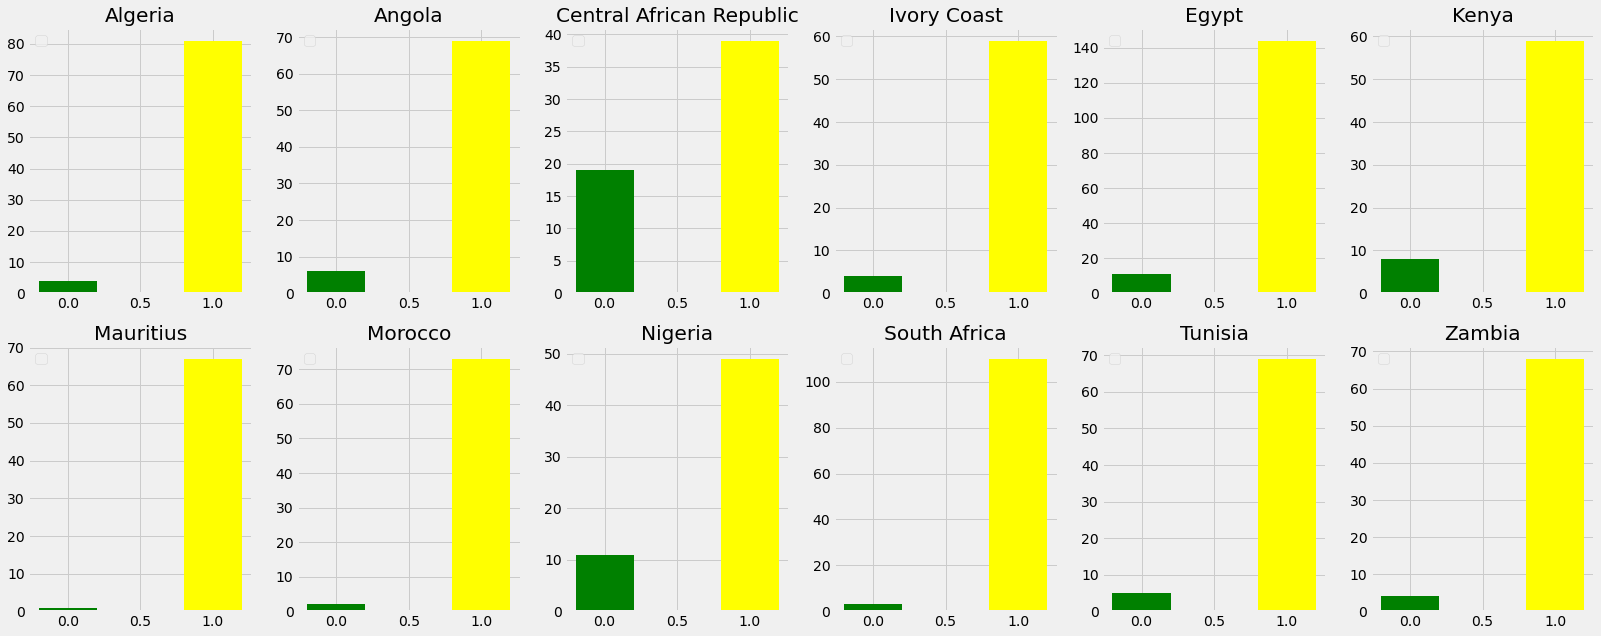

In [ ]:
fig=plt.figure(figsize=(25,10))
countries=cleaned_df['country'].unique().tolist()
lst_len=len(countries)
for i in range(lst_len-1):
    ax=fig.add_subplot(2,6,i+1)
    c=cleaned_df[cleaned_df['country']==countries[i]]['banking_crisis'].value_counts()
    ax.bar(c.index,c.tolist(),color=['yellow','green'],width=0.4)
    ax.set_title(countries[i])
    plt.legend(loc='best')
plt.show()

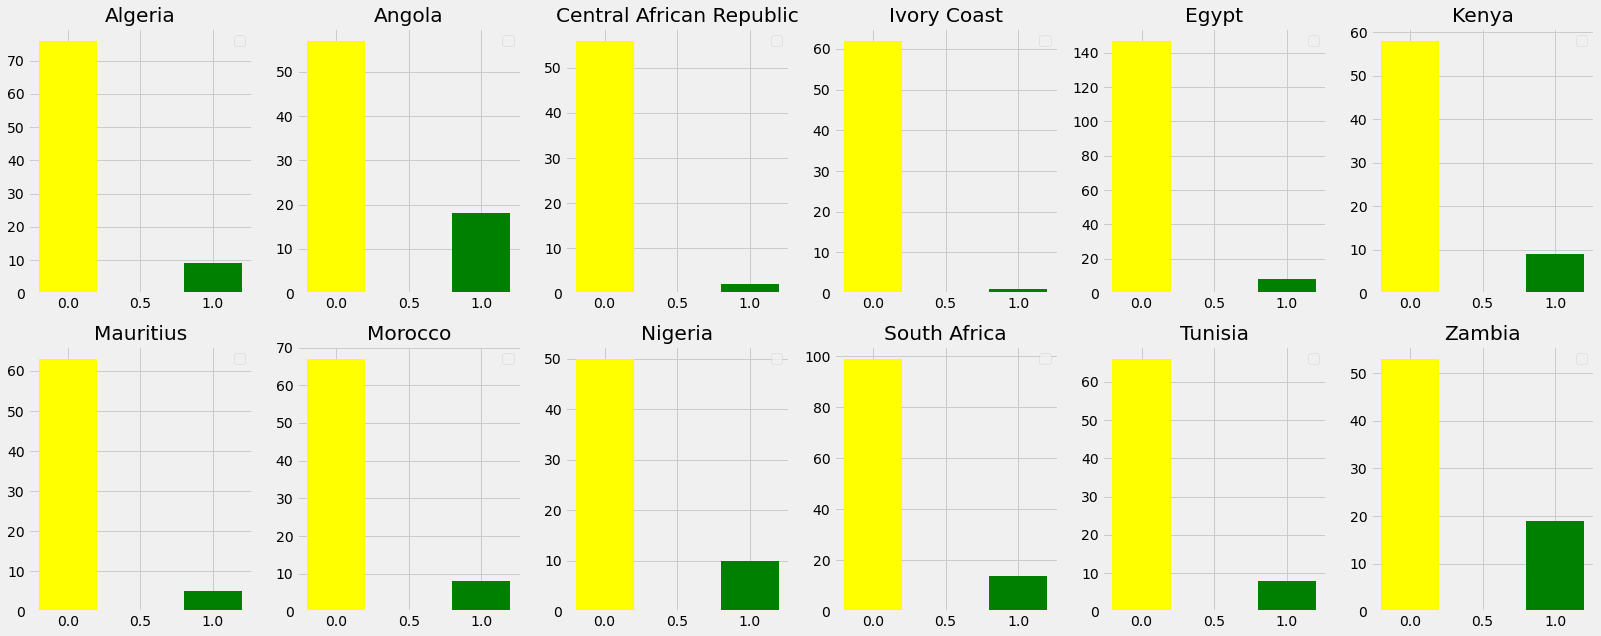

In [ ]:
fig=plt.figure(figsize=(25,10))
countries=cleaned_df['country'].unique().tolist()
lst_len=len(countries)
for i in range(lst_len-1):
    ax=fig.add_subplot(2,6,i+1)
    c=cleaned_df[cleaned_df['country']==countries[i]]['currency_crises'].value_counts()
    ax.bar(c.index,c.tolist(),color=['yellow','green'],width=0.4)
    ax.set_title(countries[i])
    plt.legend(loc='best')
plt.show()

In [ ]:
def visual_summary(type_, df, col):
    
    if type_ == 'hist':
        df[col].hist(bins = 20)
        plt.show()
    elif type_ == 'scatter':
        plt.scatter(df[col[0]], df[col[1]])
        plt.show()
    elif type_ == 'pie':
        plt.pie(df[col].value_counts())
        plt.show()
    else:
        print("Call the function again with proper parameters.")
    

In [ ]:
def central_tendency(type_, df, col):
    
    if type_== 'mean':
        cent_tend = df[col].mean()
    if type_ == 'mode':
        cent_tend = df[col].mode()
    if type_ == 'median':
        cent_tend = df[col].median()
        
    return cent_tend

In [ ]:
def measure_of_dispersion(type_, df, col):
    
    if type_ == 'range':
        maximum = df[col].max()
        minimum = df[col].min()
        disp = maximum - minimum 
        
    elif type_ == 'MAD':
        mean = df[col].mean()
        distance = abs(df[col] - mean)
        disp = distance.sum()/len(distance)
        
    elif type_ == 'std dev':
        mean = df[col].mean()
        distance = (df[col] - mean)**2
        disp = (distance.sum()/len(distance))**(1/2)
        
    elif type_ == 'CV':
        mean = df[col].mean()
        std = measure_of_dispersion('std dev', df, col)
        disp = (std/mean)*100
        
    elif type_ == 'iqr':
        q1 = df[col].quantile(q=0.25)
        q3 = df[col].quantile(q=0.75)
        disp = q3-q1

    elif type_ == 'cov':
        new = df[col]
        mean_col1 = new[col[0]].mean()
        mean_col2 = new[col[1]].mean()
        diff_col1 = (new[col[0]] - mean_col1)
        diff_col2 = (new[col[1]] - mean_col2)
        summation = (diff_col1 * diff_col2).sum()
        n = new.shape[0]
        disp = summation/n

    else:
        print("Call the measure_of_dispersion() with proper parameters.")
    
    

    
    return disp

In [ ]:
def calculate_correlation(type_, df, col1, col2):

    newdf = df[[col1, col2]]
    
    if type_ == 'Pearson':
        # Calulating Pearson correlation coefficient
        covariance = newdf.cov().iloc[0,1]
        std_col1 = newdf[col1].std()
        std_col2 = newdf[col2].std()
        corr = covariance/(std_col1*std_col2)
        
    elif type_ == 'Spearman':
        # Calculating Spearman rank correlation coefficient
        ranks = newdf.rank(axis=0)
        ranks['d^2'] = (ranks[col1] - ranks[col2])**2
        d_square = ranks['d^2'].sum()
        n = ranks.shape[0]
        corr = 1 - ((6*d_square)/(n**3 - n))
        
    else:
        print("Call the calculate_correlation() with proper parameters.")
    
    
    return corr

In [ ]:
def calculate_probability_discrete(data, event):

    total = data.value_counts().sum()
    yes = data.value_counts()[event]
    prob = yes/total
    
    
    return prob
    


In [ ]:
def event_independence_check(prob_event1, prob_event2, prob_event1_event2):

    if (prob_event1_event2 == prob_event1 * prob_event2):
        print("Event 1 and Event 2 are independent.")
    else:
        print("Event 1 and Event 2 are not independent.")



In [ ]:
def bayes_theorem(df, col1, event1, col2, event2):

    p_A = calculate_probability_discrete(df[col1],event1)
    p_B = calculate_probability_discrete(df[col2],event2)
    p_B_given_A = calculate_probability_discrete(df[df[col1]==event1][col2],event2)
    
    prob = (p_A*p_B_given_A)/p_B
        
    return prob




Country:  Algeria


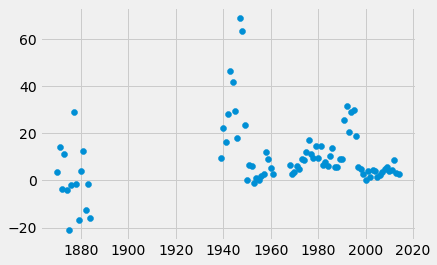

Country:  Angola


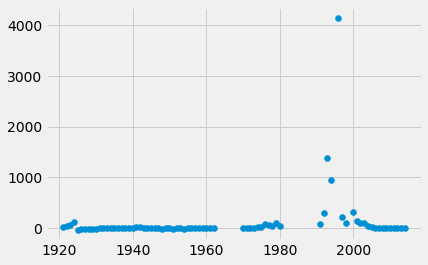

Country:  Central African Republic


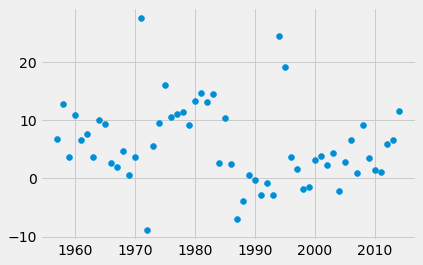

Country:  Ivory Coast


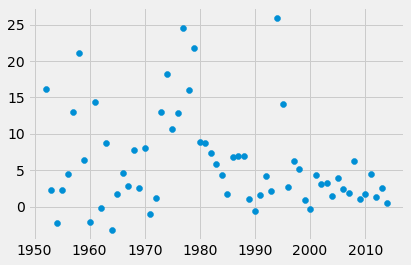

Country:  Egypt


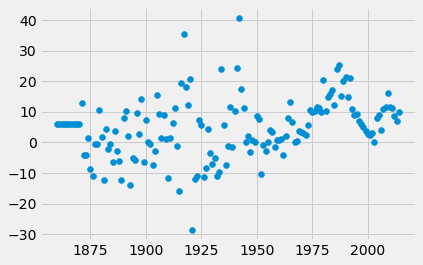

Country:  Kenya


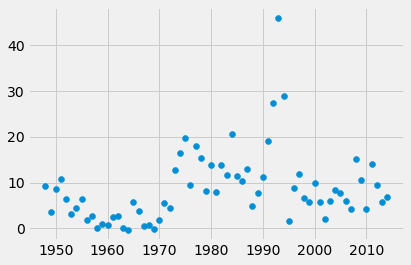

Country:  Mauritius


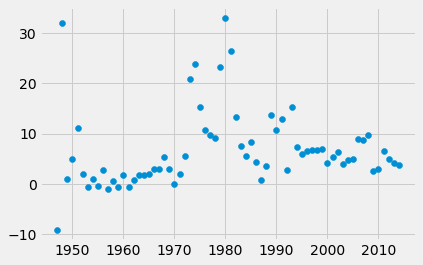

Country:  Morocco


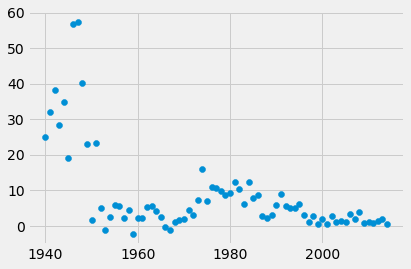

Country:  Nigeria


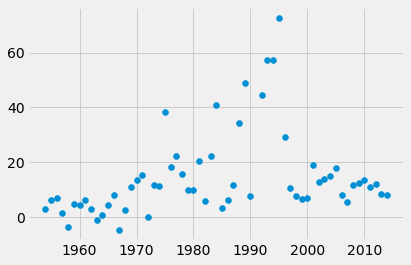

Country:  South Africa


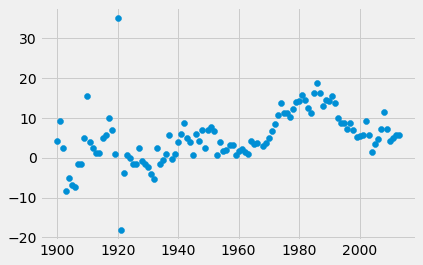

Country:  Tunisia


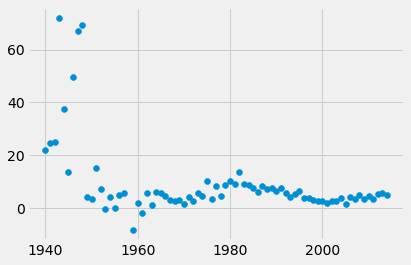

Country:  Zambia


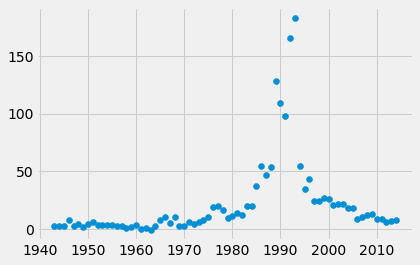

Country:  Zimbabwe


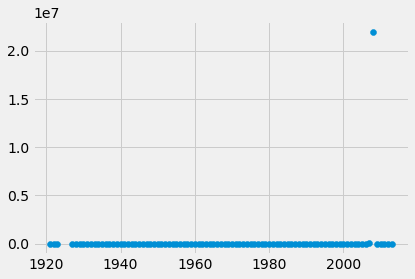

Mean of exch_usd: 43.298033240527865
Mode of country 0    Egypt
dtype: object
Median of exch_usd: 0.89845


In [ ]:
for c in list(cleaned_df['country'].unique()):
    print("Country: ", c)
    visual_summary('scatter', cleaned_df[cleaned_df['country'] == c], ['year', 'inflation_annual_cpi'])

# You might also want to see the central tendency of certain variables. Call the central_tendency() to do the same.
# This can also be done at country level or based on years by passing appropriate arguments to the fuction.
print("Mean of exch_usd:", central_tendency('mean', cleaned_df, 'exch_usd'))
print("Mode of country", central_tendency('mode', cleaned_df, 'country'))
print("Median of exch_usd:", central_tendency('median', cleaned_df, 'exch_usd'))

In [ ]:
# Measures of dispersion gives a good insight about the distribution of the variable.
# Call the measure_of_dispersion() with desired parameters and see the summary of different variables.
print("Range of inflation_annual_cpi: ", measure_of_dispersion('range', cleaned_df, 'inflation_annual_cpi'))
print("MAD of gdp_weighted_default:", measure_of_dispersion('MAD', cleaned_df, 'gdp_weighted_default'))
print("CV of gdp_weighted_default:", measure_of_dispersion('CV', cleaned_df, 'gdp_weighted_default'))
print("Std Dev of gdp_weighted_default:", measure_of_dispersion('std dev', cleaned_df, 'gdp_weighted_default'))
print("Cov between 'gdp_weighted_default', 'inflation_annual_cpi':", measure_of_dispersion('cov', cleaned_df, ['gdp_weighted_default', 'inflation_annual_cpi']))



Range of inflation_annual_cpi:  21989723.722136877
MAD of gdp_weighted_default: 0.012389155679342328
CV of gdp_weighted_default: 684.5082166961108
Std Dev of gdp_weighted_default: 0.04360090252320251
Cov between 'gdp_weighted_default', 'inflation_annual_cpi': -133.21374098239832


In [ ]:
# There might exists a correlation between different variables. 
# Call the calculate_correlation() to check the correlation of the variables you desire.
print("Corr between inflation_annual_cpi and systemic_crisis", calculate_correlation('Pearson',cleaned_df,'inflation_annual_cpi','systemic_crisis'))


Corr between inflation_annual_cpi and systemic_crisis 0.10643604360527453


In [ ]:
# From the given data, let's check the probability of banking_crisis for different countries.
# Call the calculate_probability_discrete() to check the desired probability.
# Also check which country has the maximum probability of facing the crisis.  
# You can do it by storing the probabilities in a dictionary, with country name as the key. Or you are free to use any other technique.
prob_crisis = {}
for c in list(df.country.unique()):
        print("Country: ", c)
        prob_crisis[c] = round(calculate_probability_discrete(cleaned_df[cleaned_df['country'] == c]['banking_crisis'],0 ), 4)
        print("Probability of Crisis: ", prob_crisis[c])
        
print(prob_crisis)

Country:  Algeria
Probability of Crisis:  0.0471
Country:  Angola
Probability of Crisis:  0.08
Country:  Central African Republic
Probability of Crisis:  0.3276
Country:  Ivory Coast
Probability of Crisis:  0.0635
Country:  Egypt
Probability of Crisis:  0.071
Country:  Kenya
Probability of Crisis:  0.1194
Country:  Mauritius
Probability of Crisis:  0.0147
Country:  Morocco
Probability of Crisis:  0.0267
Country:  Nigeria
Probability of Crisis:  0.1833
Country:  South Africa
Probability of Crisis:  0.0265
Country:  Tunisia
Probability of Crisis:  0.0676
Country:  Zambia
Probability of Crisis:  0.0556
Country:  Zimbabwe
Probability of Crisis:  0.1667
{'Algeria': 0.0471, 'Angola': 0.08, 'Central African Republic': 0.3276, 'Ivory Coast': 0.0635, 'Egypt': 0.071, 'Kenya': 0.1194, 'Mauritius': 0.0147, 'Morocco': 0.0267, 'Nigeria': 0.1833, 'South Africa': 0.0265, 'Tunisia': 0.0676, 'Zambia': 0.0556, 'Zimbabwe': 0.1667}


In [ ]:
# Next, let us check if banking_crisis is independent of systemic_crisis, currency_crisis & inflation_crisis.
# Calculate the probabilities of these event using calculate_probability_discrete() & joint probabilities as well.
# Then call event_independence_check() with above probabilities to check for independence.
b_crisis = calculate_probability_discrete(cleaned_df['banking_crisis'],0 )
s_crisis = calculate_probability_discrete(cleaned_df['systemic_crisis'], 1 )
c_crisis = calculate_probability_discrete(cleaned_df['currency_crises'], 1 )
i_crisis = calculate_probability_discrete(cleaned_df['inflation_crises'], 1 )

df1 = cleaned_df[cleaned_df['currency_crises'] == 1]

In [ ]:
# Calculate the P(A|B)
p_i_given_c = df1[df1['inflation_crises'] == 1].shape[0]/df1.shape[0]
p_c_i = p_i_given_c * c_crisis
print(p_c_i, c_crisis * i_crisis)
event_independence_check(c_crisis, i_crisis, p_c_i)

# Finally, let us calculate the probability of banking_crisis given that other crises (systemic_crisis, currency_crisis & inflation_crisis one by one) have already occured.
# This can be done by calling the bayes_theorem() you have defined with respective parameters.

prob_ = []

prob_.append(bayes_theorem(df,'banking_crisis','crisis','systemic_crisis', 1))
prob_.append(bayes_theorem(df,'banking_crisis','crisis','currency_crises', 1))
prob_.append(bayes_theorem(df,'banking_crisis','crisis','inflation_crises', 1))


print("Probability of banking_crisis given that other crisis have already occured:", prob_)

0.05971563981042654 0.016010422048022277
Event 1 and Event 2 are not independent.
Probability of banking_crisis given that other crisis have already occured: [0.9268292682926829, 0.21212121212121213, 0.2627737226277373]
